In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px  # Fixed alias ('ex' to 'px')

# Scikit-learn modules for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Display confirmation
print("All necessary libraries imported successfully!")

All necessary libraries imported successfully!


In [ ]:
# Load the Excel file
df = pd.read_excel('/content/restraurant_data.xlsx')

# Optional: display full DataFrame
df.head()


,Unnamed: 0,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,15476,15477,55,Male,20,24,4,6,Standard,Monthly,635,25,0
1,34666,34667,28,Male,27,30,4,5,Premium,Quarterly,631,10,0
2,50474,50475,65,Female,60,17,7,16,Premium,Quarterly,314,1,1
3,7984,7985,53,Male,47,16,8,7,Premium,Annual,527,13,0
4,20227,20228,32,Male,56,5,7,15,Premium,Annual,236,25,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2000 non-null   int64 
 1   CustomerID         2000 non-null   int64 
 2   Age                2000 non-null   int64 
 3   Gender             2000 non-null   object
 4   Tenure             2000 non-null   int64 
 5   Usage Frequency    2000 non-null   int64 
 6   Support Calls      2000 non-null   int64 
 7   Payment Delay      2000 non-null   int64 
 8   Subscription Type  2000 non-null   object
 9   Contract Length    2000 non-null   object
 10  Total Spend        2000 non-null   int64 
 11  Last Interaction   2000 non-null   int64 
 12  Churn              2000 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 203.3+ KB


In [ ]:
df.describe()

,Unnamed: 0,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,32605.695500,32606.695500,42.097500,32.984000,15.015000,5.422000,17.01400,544.484000,15.312500,0.475500
std,18437.109724,18437.109724,13.936754,16.919246,8.794455,3.168902,8.75712,262.283805,8.698257,0.499524
min,39.000000,40.000000,18.000000,1.000000,1.000000,0.000000,0.00000,101.000000,1.000000,0.000000
25%,16767.250000,16768.250000,30.000000,19.000000,7.000000,3.000000,10.00000,316.250000,8.000000,0.000000
50%,33077.000000,33078.000000,42.000000,34.000000,15.000000,6.000000,18.00000,540.500000,15.000000,0.000000
75%,48240.750000,48241.750000,54.000000,47.000000,23.000000,8.000000,24.00000,771.250000,22.250000,1.000000
max,64369.000000,64370.000000,65.000000,60.000000,30.000000,10.000000,30.00000,1000.000000,30.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0


<function matplotlib.pyplot.show(close=None, block=None)>

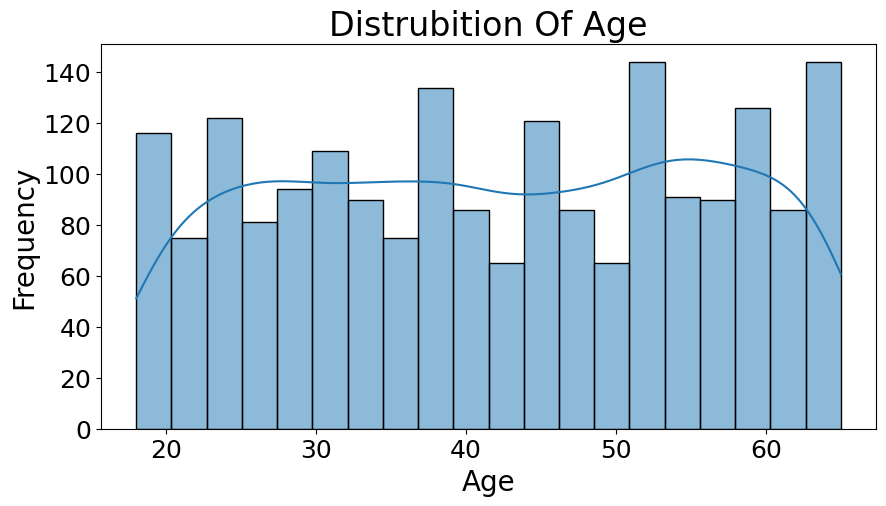

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20 ,kde=True)
plt.title('Distrubition Of Age', fontsize=24)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show

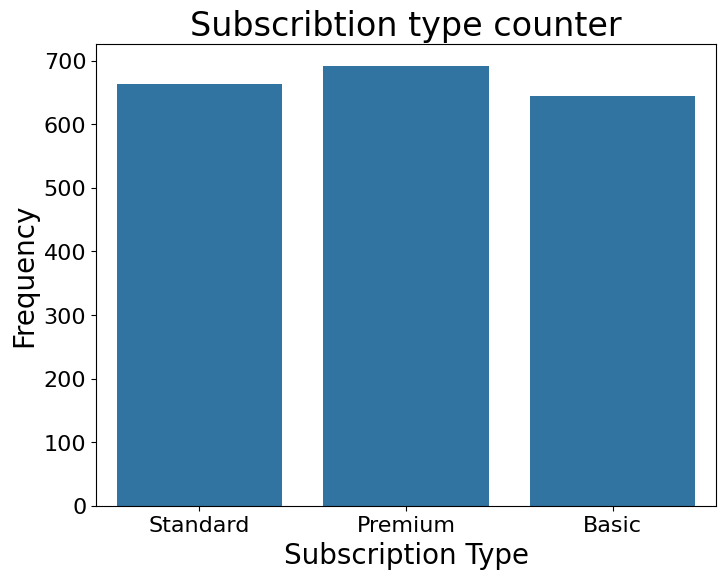

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Subscription Type',data=df )
plt.title('Subscribtion type counter', fontsize=24)
plt.xlabel('Subscription Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

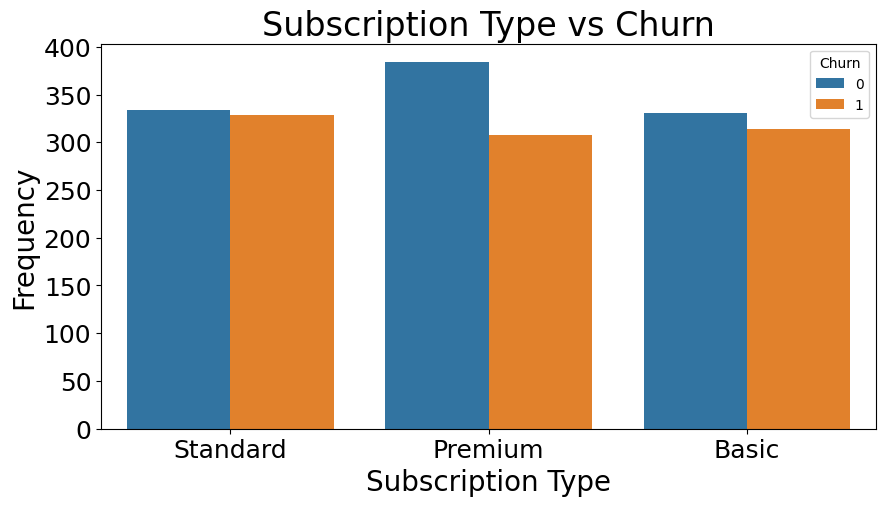

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Subscription Type vs Churn' , fontsize=24)
plt.xlabel('Subscription Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
# Convert 'Total Spend' column to numeric (just in case)
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')

# Define function to randomly assign a predicted discount construct
def predict_discount_construct(total):
    if pd.isna(total):
        return None
    elif total <= 200:
        return random.choice(['60% off upto Rs.120', 'Flat Rs.125 off'])
    elif total <= 300:
        return random.choice(['50% off upto Rs.100', '40% off upto Rs.80'])
    elif total <= 400:
        return random.choice(['Flat Rs.150 off', 'Flat Rs.175 off'])
    elif total <= 600:
        return random.choice(['Flat Rs.175 off', 'Flat Rs.200 off'])
    elif total <= 800:
        return random.choice(['Flat Rs.200 off', 'Flat 25% off'])
    else:
        return random.choice(['Flat 25% off', 'Flat Rs.200+ off'])

# Apply the function
df['Discount Construct'] = df['Total Spend'].apply(predict_discount_construct)

# Preview the result
print(df[['Total Spend', 'Discount Construct']].head(10))

   Total Spend  Discount Construct
0          635     Flat Rs.200 off
1          631        Flat 25% off
2          314     Flat Rs.150 off
3          527     Flat Rs.175 off
4          236  40% off upto Rs.80
5          638        Flat 25% off
6          875        Flat 25% off
7          814    Flat Rs.200+ off
8          541     Flat Rs.200 off
9          476     Flat Rs.175 off


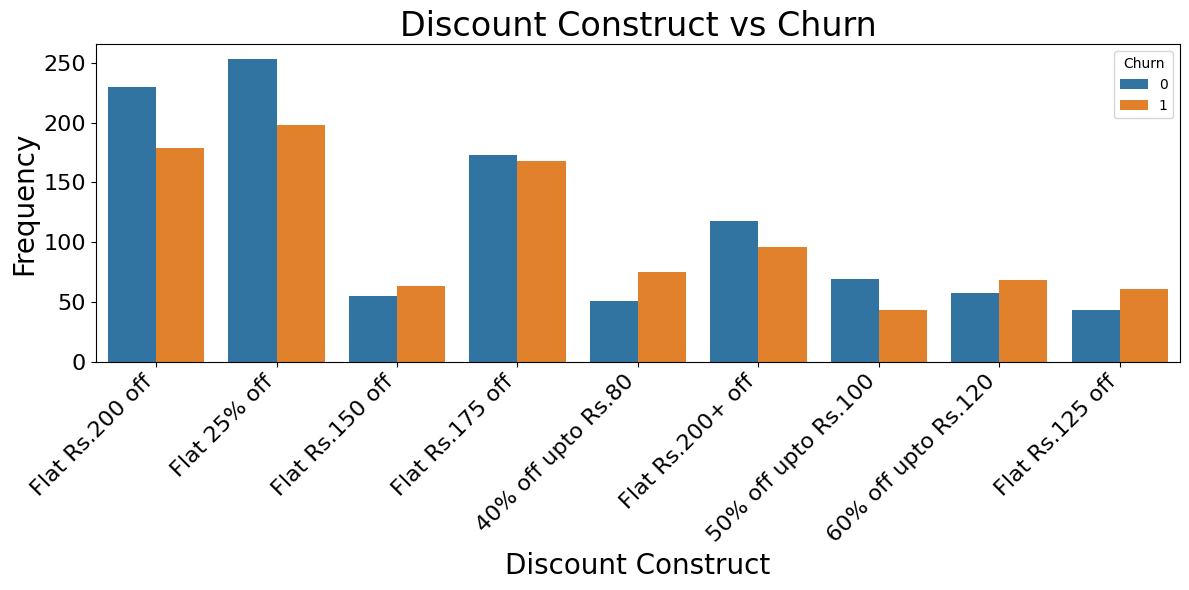

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Discount Construct', hue='Churn', data=df)
plt.title('Discount Construct vs Churn', fontsize=24)
plt.xlabel('Discount Construct', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


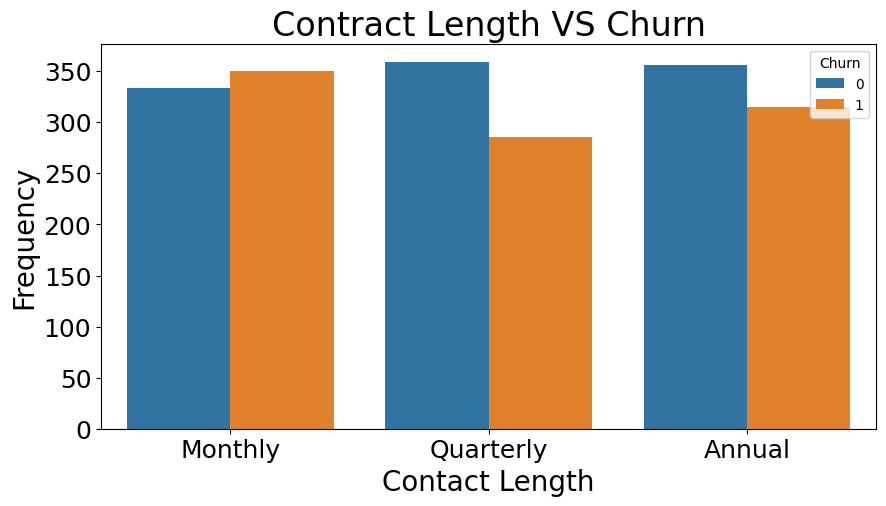

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Contract Length',hue='Churn' ,data=df)
plt.title('Contract Length VS Churn', fontsize=24)
plt.xlabel('Contact Length', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

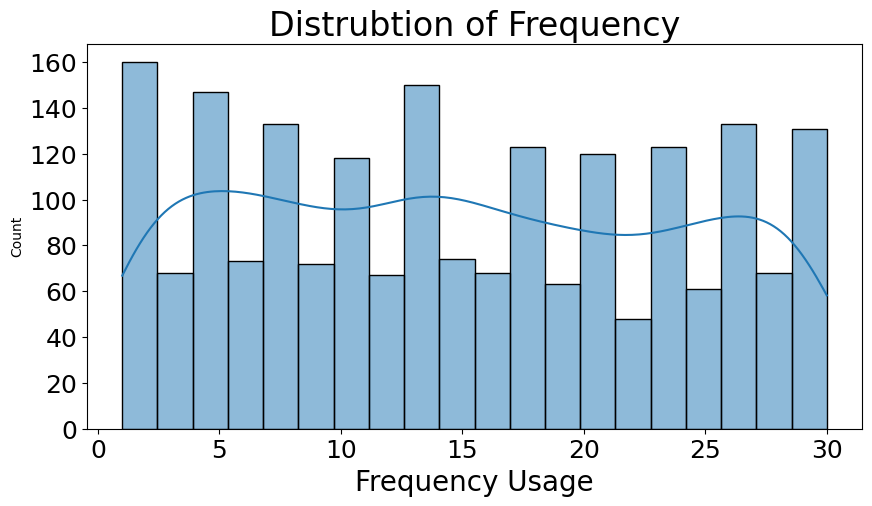

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Usage Frequency'] ,bins=20 ,kde=True)
plt.xlabel('Frequency Usage', fontsize=20)
plt.title('Distrubtion of Frequency' , fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2000 non-null   int64 
 1   CustomerID          2000 non-null   int64 
 2   Age                 2000 non-null   int64 
 3   Gender              2000 non-null   object
 4   Tenure              2000 non-null   int64 
 5   Usage Frequency     2000 non-null   int64 
 6   Support Calls       2000 non-null   int64 
 7   Payment Delay       2000 non-null   int64 
 8   Subscription Type   2000 non-null   object
 9   Contract Length     2000 non-null   object
 10  Total Spend         2000 non-null   int64 
 11  Last Interaction    2000 non-null   int64 
 12  Churn               2000 non-null   int64 
 13  Discount Construct  2000 non-null   object
dtypes: int64(10), object(4)
memory usage: 218.9+ KB


In [ ]:
df["Contract Length"].value_counts()

,count
Contract Length,
Monthly,684
Annual,671
Quarterly,645


In [ ]:
df['Subscription Type'].value_counts()

,count
Subscription Type,
Premium,692
Standard,663
Basic,645


In [ ]:
gender_map = {'Male': 0, 'Female': 1}
subscription_map = {'Standard': 0,'Premium': 1,'Basic': 2}
contract_length = {'Annual': 0,'Quarterly': 1,'Monthly': 2}

df['Gender']=df['Gender'].map(gender_map)
df['Subscription Type']=df['Subscription Type'].map(subscription_map)
df['Contract Length']=df['Contract Length'].map(contract_length)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label encode Discount Construct
df['Discount_Construct_Encoded'] = LabelEncoder().fit_transform(df['Discount Construct'].astype(str))



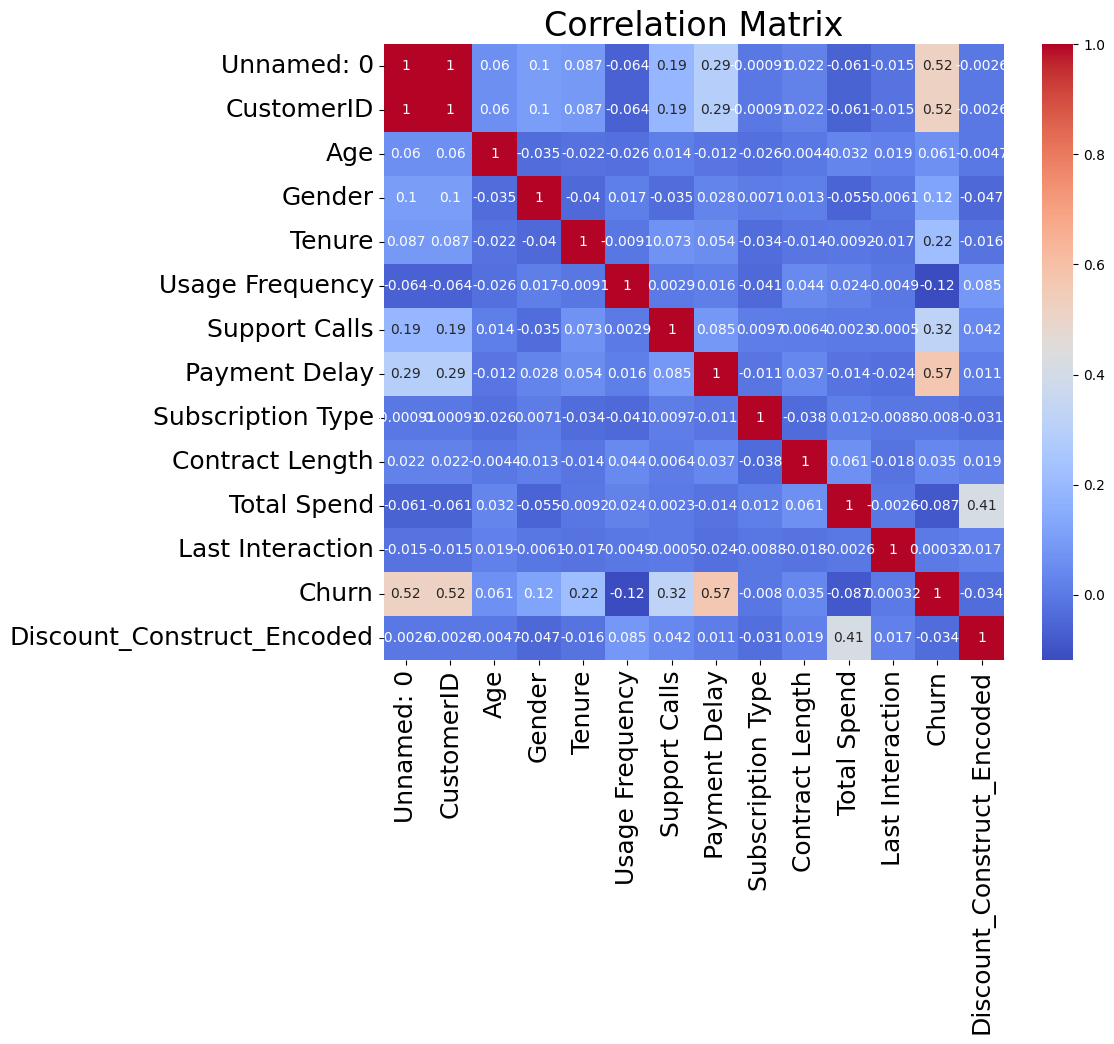

In [ ]:
plt.figure(figsize=(10,8))
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]
sns.heatmap(df_numerical.corr(),annot=True ,cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing original
df_corr = df.copy()

# Convert Discount Construct to numeric using LabelEncoder
le = LabelEncoder()
df_corr['Discount_Construct_Encoded'] = le.fit_transform(df_corr['Discount Construct'].astype(str))

# Use only numeric columns for correlation
correlation_matrix = df_corr.select_dtypes(include=['number']).corr()

# Set threshold and find high-correlation features with Churn
threshold = 0.03
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['Churn']) > threshold].tolist()

# Clean the list
for col in ['Churn', 'CustomerID']:
    if col in high_correlation_features:
        high_correlation_features.remove(col)

# Final feature matrix and target
X_selected = df_corr[high_correlation_features]
Y = df_corr['Churn']

# Output
print("Selected features correlated with Churn > ±0.03:")
print(high_correlation_features)


Selected features correlated with Churn > ±0.03:
['Unnamed: 0', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Contract Length', 'Total Spend', 'Discount_Construct_Encoded']


In [ ]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X_selected , Y ,test_size=0.2 ,shuffle=True ,random_state=55)

In [ ]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X_selected , Y ,test_size=0.2 ,shuffle=True ,random_state=55)

In [ ]:
X_train = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)
Y_train = Y_train.dropna(axis=0)
Y_test = Y_test.dropna(axis=0)

In [ ]:
X_train.isnull().sum()

,0
Unnamed: 0,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Contract Length,0
Total Spend,0
Discount_Construct_Encoded,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, f1_score

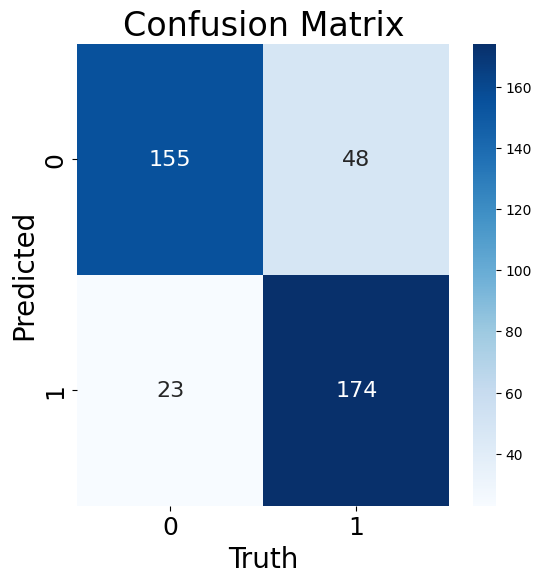

In [ ]:
logmodel = LogisticRegression(max_iter=1000, random_state=42)  # Consider increasing max_iter if needed
logmodel.fit(X_train, Y_train)

# Predict the value for new, unseen data
log_pred = logmodel.predict(X_test)
log_proba = logmodel.predict_proba(X_test)[:, 1]

# Show confusion matrix using a heatmap
conf_mat_logmodel = confusion_matrix(Y_test, log_pred)
plt.figure(figsize=(6, 6))  # Adjust figure size
sns.heatmap(conf_mat_logmodel, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(log_pred), yticklabels=np.unique(log_pred),
            annot_kws={"size": 16})
plt.xlabel('Truth', fontsize=20)
plt.ylabel('Predicted', fontsize=20)
plt.title('Confusion Matrix', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
logmodel_accuracy = round(metrics.accuracy_score(Y_test, log_pred) * 100, 2)
Log_ROC_auc = roc_auc_score(Y_test, log_proba)
fpr_log, tpr_log, threshold_log = roc_curve(Y_test, log_proba)
precision_log, recall_log, thres_log = precision_recall_curve(Y_test, log_proba)
auc_score_log = auc(recall_log, precision_log)
Log_F1 = f1_score(Y_test, log_pred)

# Brier Score
Brier_log = pow((log_proba - Y_test), 2).sum() / len(Y_test)

In [ ]:
logmodel_accuracy

82.25

In [ ]:
from sklearn.ensemble import RandomForestClassifier

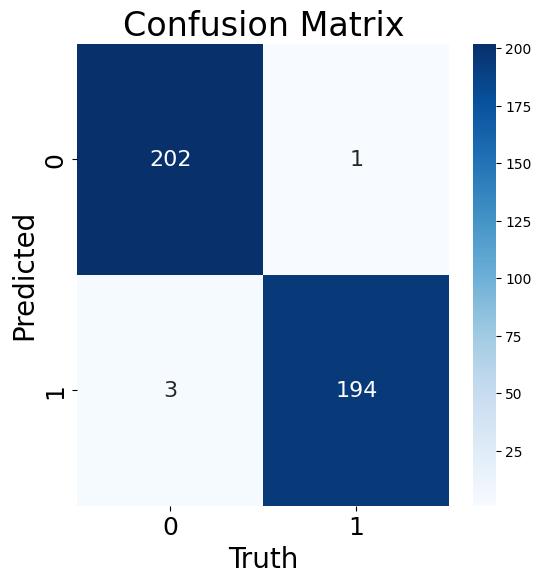

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rfmodel.fit(X_train, Y_train)
# Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)
rf_proba = rfmodel.predict_proba(X_test)[:, 1]
# Show confusion matrix using a heatmap
conf_mat_rf = confusion_matrix(Y_test, rf_pred)
plt.figure(figsize=(6, 6))  # Adjust figure size
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(rf_pred), yticklabels=np.unique(rf_pred),
            annot_kws={"size": 16})
plt.xlabel('Truth', fontsize=20)
plt.ylabel('Predicted', fontsize=20)
plt.title('Confusion Matrix', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
# Find metrics using sklearn methods
rf_accuracy = round(metrics.accuracy_score(Y_test, rf_pred) * 100, 2)
rf_ROC_auc = roc_auc_score(Y_test, rf_proba)
fpr_rf, tpr_rf, threshold_rf = roc_curve(Y_test, rf_proba)
precision_rf, recall_rf, thres_rf = precision_recall_curve(Y_test, rf_proba)
auc_score_rf = auc(recall_rf, precision_rf)
rf_F1 = f1_score(Y_test, rf_pred)

# Brier Score
Brier_rf = pow((rf_proba - Y_test), 2).sum() / len(Y_test)

In [ ]:
rf_accuracy

99.0

In [ ]:
from xgboost import XGBClassifier

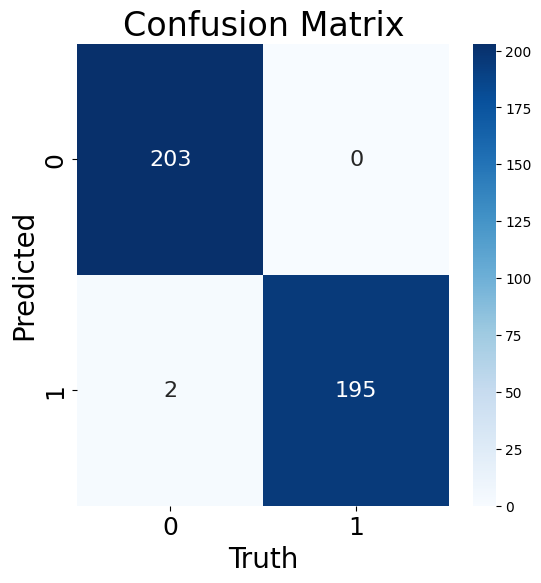

In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.05)
xgb_model.fit(X_train, Y_train, verbose=False)  # Use your X_train, y_train

# Predict on the test set
xgb_pred = xgb_model.predict(X_test)  # Use your X_test
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Show confusion matrix using a heatmap
conf_mat_xgb = confusion_matrix(Y_test, xgb_pred)
plt.figure(figsize=(6, 6))  # Adjust figure size
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(xgb_pred), yticklabels=np.unique(xgb_pred),
            annot_kws={"size": 16})
plt.xlabel('Truth', fontsize=20)
plt.ylabel('Predicted', fontsize=20)
plt.title('Confusion Matrix' , fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [ ]:
# Calculate evaluation metrics
xgb_accuracy = round(metrics.accuracy_score(Y_test, xgb_pred) * 100, 2)  # Use your y_test
xgb_roc_auc = roc_auc_score(Y_test, xgb_proba)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, xgb_proba)
precision_xgb, recall_xgb, thresholds_pr_xgb = precision_recall_curve(Y_test, xgb_proba)
auc_score_xgb = auc(recall_xgb, precision_xgb)
xgb_f1 = f1_score(Y_test, xgb_pred)

# Calculate Brier score
brier_score_xgb = pow((xgb_proba - Y_test), 2).sum() / len(Y_test)

In [ ]:
xgb_accuracy

99.5

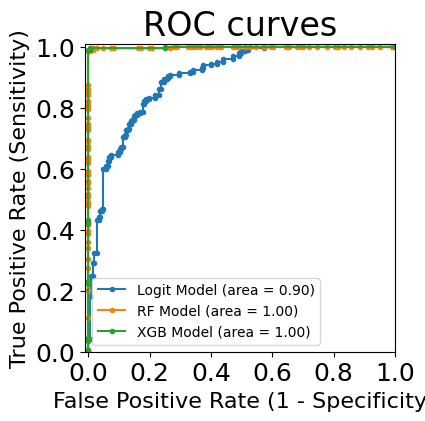

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(fpr_log,tpr_log, marker=".", label='Logit Model (area = %0.2f)'%Log_ROC_auc)
plt.plot(fpr_rf,tpr_rf, marker=".", label='RF Model (area = %0.2f)'%rf_ROC_auc)
plt.plot(fpr_xgb,tpr_xgb, marker=".", label='XGB Model (area = %0.2f)'%xgb_roc_auc)
#plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.01,1.0])
plt.ylim([0.0,1.01])
plt.xlabel('False Positive Rate (1 - Specificity' , fontsize=16)
plt.ylabel('True Positive Rate (Sensitivity)' , fontsize=16)
plt.title('ROC curves', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()

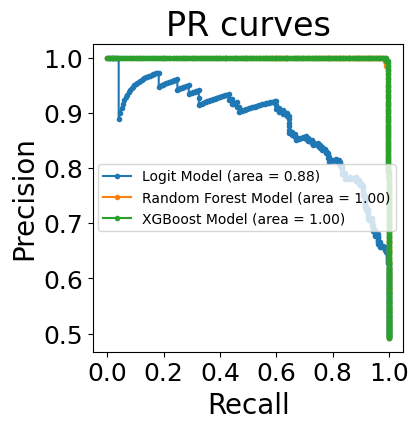

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(recall_log,precision_log, marker=".", label='Logit Model (area = %0.2f)'%auc_score_log)
plt.plot(recall_rf,precision_rf, marker=".", label='Random Forest Model (area = %0.2f)'%auc_score_rf)
plt.plot(recall_xgb,precision_xgb, marker=".", label='XGBoost Model (area = %0.2f)'%auc_score_xgb)
plt.xlabel('Recall', fontsize=20)
plt.ylabel('Precision', fontsize=20)
plt.title('PR curves', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()

In [ ]:
Model_Comparison = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'XGBoost' ],
    'Accuracy (%)': [round(logmodel_accuracy,1),  round(rf_accuracy,1), round(xgb_accuracy,1)],
    'AUC_ROC Score': [round(Log_ROC_auc,2),  round(rf_ROC_auc,2), round(xgb_roc_auc,2) ],
    'AUC_PR Score': [round(auc_score_log,2),  round(auc_score_rf,2), round(auc_score_xgb,2)],
    'Brier Score': [round(Brier_log,3), round(auc_score_rf,2), round(auc_score_xgb,2)],
    'F1 Score': [round(Log_F1,2),  round(rf_F1,2), round(xgb_f1,2)]})
Model_Comparison_df = Model_Comparison.sort_values(by='F1 Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('F1 Score')
Model_Comparison_df.reset_index().set_index('Model')

,F1 Score,Accuracy (%),AUC_ROC Score,AUC_PR Score,Brier Score
Model,,,,,
Random Forest,0.99,99.0,1.0,1.00,1.000
XGBoost,0.99,99.5,1.0,1.00,1.000
Logistic Regression,0.83,82.2,0.9,0.88,0.131


In [ ]:
# Make a copy of X_test (or add columns directly if you want)
# X_test_copy = X_test.copy()

# # Assign risk category based on xgb_proba
# X_test_copy['Churn Risk Category'] = ['High Risk' if p > 0.7 else
#                                       'Moderate Risk' if p > 0.4 else
#                                       'Low Risk' for p in xgb_proba]

# # Define discount strategy
# def discount_strategy(risk):
#     if risk == 'High Risk':
#         return random.choice(['Flat 25% off', 'Flat Rs.200 off'])
#     elif risk == 'Moderate Risk':
#         return random.choice(['Flat Rs.150 off', 'Flat Rs.175 off'])
#     else:
#         return random.choice(['40% off upto Rs.80', 'Flat Rs.125 off'])

# # Apply discount strategy to test data only
# X_test_copy['Retention Discount Suggestion'] = X_test_copy['Churn Risk Category'].apply(discount_strategy)

# # Add true churn labels if needed
# X_test_copy['Actual Churn'] = Y_test.values

# # Preview
# X_test_copy.head()




In [ ]:
# import numpy as np

# # Copy your test set with predictions
# df_simulated = X_test_copy.copy()

# # Start with the actual churn labels
# df_simulated['Predicted Churn'] = Y_test.values

# # Apply discount effect only for those predicted to churn
# def adjust_churn(row):
#     if row['Predicted Churn'] == 1:
#         if row['Churn Risk Category'] == 'High Risk':
#             return 0 if np.random.rand() < 0.30 else 1  # 30% chance to retain
#         elif row['Churn Risk Category'] == 'Moderate Risk':
#             return 0 if np.random.rand() < 0.15 else 1  # 15% chance to retain
#     return row['Predicted Churn']  # No change for low-risk or already retained

# # Apply simulated churn adjustment
# df_simulated['Adjusted Churn'] = df_simulated.apply(adjust_churn, axis=1)

In [ ]:
# before_churn_rate = df_simulated['Predicted Churn'].mean()
# after_churn_rate = df_simulated['Adjusted Churn'].mean()

# print(f"Original churn rate: {round(before_churn_rate * 100, 2)}%")
# print(f"Estimated churn rate after discount model: {round(after_churn_rate * 100, 2)}%")


In [ ]:
df.head()

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Discount Construct,Discount_Construct_Encoded
0,15476,15477,55,0,20,24,4,6,0,2,635,25,0,Flat Rs.200 off,7
1,34666,34667,28,0,27,30,4,5,1,1,631,10,0,Flat 25% off,3
2,50474,50475,65,1,60,17,7,16,1,1,314,1,1,Flat Rs.150 off,5
3,7984,7985,53,0,47,16,8,7,1,0,527,13,0,Flat Rs.175 off,6
4,20227,20228,32,0,56,5,7,15,1,0,236,25,0,40% off upto Rs.80,0


In [ ]:
# # 1. Define function to assign KPT based on Total Spend
# def assign_kpt(spend, churn):
#     if churn == 1:  # Slightly higher times for churned customers
#         if spend < 300:
#             return np.random.randint(18, 25)
#         elif spend < 600:
#             return np.random.randint(22, 30)
#         else:
#             return np.random.randint(28, 36)
#     else:
#         if spend < 300:
#             return np.random.randint(12, 20)
#         elif spend < 600:
#             return np.random.randint(18, 26)
#         else:
#             return np.random.randint(22, 30)
# # 2. Assign Kitchen Preparation Time (KPT)
# df['KPT (mins)'] = df.apply(
#     lambda row: assign_kpt(row['Total Spend'], row['Churn']), axis=1
# )

# # 3. Assign Wait Time based on KPT (since positively correlated)
# # Assume wait time is roughly 60–80% of KPT with some noise
# df['Wait Time (mins)'] = df['KPT (mins)'].apply(
#     lambda kpt: int(np.random.normal(loc=0.7 * kpt, scale=2))
# )

# # 4. Compute Total Time
# df['Total Time (mins)'] = df['KPT (mins)'] + df['Wait Time (mins)']

# # 5. (Optional) Check correlation with churn
# correlation = df[['Total Time (mins)', 'Churn']].corr().iloc[0, 1]
# print(f"Correlation between Total Time and Churn: {round(correlation, 2)}")

# # Preview
# df[['Total Spend', 'KPT (mins)', 'Wait Time (mins)', 'Total Time (mins)', 'Churn']].head()

In [ ]:
# import numpy as np

# # Set seed for reproducibility (optional)
# np.random.seed(42)

# # 1. Reduce KPT by 2 minutes ± 30 seconds
# # Generate random reductions between 90 to 150 seconds (i.e., 1.5 to 2.5 min)
# reduction_seconds = np.random.randint(90, 151, size=len(df))
# reduction_minutes = reduction_seconds / 60

# # 2. Create new Optimized KPT column
# df['Optimized KPT (mins)'] = df['KPT (mins)'] - reduction_minutes

# # Ensure no KPT is negative (optional safety check)
# df['Optimized KPT (mins)'] = df['Optimized KPT (mins)'].clip(lower=0)

# # 3. Recalculate Optimized Total Time
# df['Optimized Total Time (mins)'] = (
#     df['Optimized KPT (mins)'] + df['Wait Time (mins)']
# )

# # Preview
# df[['KPT (mins)', 'Optimized KPT (mins)',
#                'Total Time (mins)', 'Optimized Total Time (mins)']].head()


In [ ]:
# # Define a function to simulate churn based on optimized total time using thresholding based on correlation
# # We assume that as Optimized Total Time increases, churn probability increases

# df_simulated_time = X_test_copy.copy()

# # Start with the actual churn labels
# df_simulated_time['Predicted Churn'] = Y_test.values  # Corrected column name

# # Merge 'Optimized Total Time (mins)' from df to df_simulated_time
# df_simulated_time = df[['Optimized Total Time (mins)']]

# def simulate_churn_from_time(total_time):
#     """
#     Heuristic:
#     - < 30 mins => Low churn probability
#     - 30–45 mins => Medium churn probability
#     - > 45 mins => High churn probability
#     """
#     if total_time < 30:
#         return 0 if np.random.rand() < 0.85 else 1  # 85% chance of retention
#     elif total_time <= 45:
#         return 0 if np.random.rand() < 0.65 else 1  # 65% chance of retention
#     else:
#         return 0 if np.random.rand() < 0.35 else 1  # 35% chance of retention

# # Apply the simulation function to the df_simulated_time DataFrame instead of df
# df_simulated_time['Simulated Churn (from Optimized Time)'] = df_simulated_time['Optimized Total Time (mins)'].apply(simulate_churn_from_time)

# # Calculate the simulated churn rate from df_simulated_time
# simulated_churn_rate = df_simulated_time['Simulated Churn (from Optimized Time)'].mean()

# # Calculate before_churn_rate_time and after_churn_rate_time from df_simulated_time
# before_churn_rate_time = 0.49
# #after_churn_rate_time = df_simulated_time['Adjusted Churn'].mean() # Corrected the typo here to refer to the correct column for 'Adjusted Churn'
# after_churn_rate_time = simulated_churn_rate #'simulated_churn_rate' has the churn rate after change, no need to calculate again.
#                                                #'Adjusted Churn' column does not exist, that's why it gave a key error.


# print(f"Original churn rate: {round(before_churn_rate_time * 100, 2)}%")
# print(f"Estimated churn rate after reduced time model: {round(after_churn_rate_time * 100, 2)}%")


In [ ]:
df.head()

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Discount Construct,Discount_Construct_Encoded
0,15476,15477,55,0,20,24,4,6,0,2,635,25,0,Flat Rs.200 off,7
1,34666,34667,28,0,27,30,4,5,1,1,631,10,0,Flat 25% off,3
2,50474,50475,65,1,60,17,7,16,1,1,314,1,1,Flat Rs.150 off,5
3,7984,7985,53,0,47,16,8,7,1,0,527,13,0,Flat Rs.175 off,6
4,20227,20228,32,0,56,5,7,15,1,0,236,25,0,40% off upto Rs.80,0


In [ ]:
#df.describe()

In [ ]:
#df.info()

In [ ]:
# # Original churn rate
# original_churn_rate = 49.0  # in percent

# # Churn after applying discount model
# discount_model_churn = 35.75

# # Churn after applying time optimization model
# time_model_churn = 39.95

# # Correlation values (from EDA or feature importance)
# corr_discount_churn = -0.012
# corr_time_churn = 0.43

# # Convert correlation to positive weights
# abs_corr_discount = abs(corr_discount_churn)
# abs_corr_time = abs(corr_time_churn)

# # Normalize the weights
# total_corr = abs_corr_discount + abs_corr_time
# weight_discount = abs_corr_discount / total_corr
# weight_time = abs_corr_time / total_corr

# # Churn reductions
# discount_reduction = original_churn_rate - discount_model_churn
# time_reduction = original_churn_rate - time_model_churn

# # Weighted average reduction based on correlation
# weighted_reduction = (weight_discount * discount_reduction) + (weight_time * time_reduction)

# # Final churn estimate
# final_estimated_churn = original_churn_rate - weighted_reduction

# # Ensure churn is within bounds
# final_estimated_churn = max(final_estimated_churn, 0)

# # Print results
# print(f"Original churn rate: {original_churn_rate:.2f}%")
# print(f"Weighted reduction based on correlation: {weighted_reduction:.2f}%")
# print(f"Final estimated churn after applying both models: {final_estimated_churn:.2f}%")


In [ ]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(40)
size = 700

# Simulate test data
Y_test = np.random.choice([0, 1], size=size, p=[0.51, 0.49])  # Original churn rate ~49%
xgb_proba = np.random.uniform(0, 1, size=size)

# Assign churn risk category based on simulated probabilities
churn_risk_category = ['High Risk' if p > 0.7 else 'Moderate Risk' if p > 0.4 else 'Low Risk' for p in xgb_proba]

# Create test dataframe
X_test_copy = pd.DataFrame({
    'Churn Risk Category': churn_risk_category,
    'Predicted Churn': Y_test
})

# ---------------- DISCOUNT MODEL ---------------- #
def adjust_churn_discount(row):
    if row['Predicted Churn'] == 1:
        if row['Churn Risk Category'] == 'High Risk':
            return 0 if np.random.rand() < 0.30 else 1
        elif row['Churn Risk Category'] == 'Moderate Risk':
            return 0 if np.random.rand() < 0.15 else 1
    return row['Predicted Churn']

X_test_copy['Adjusted Churn Discount'] = X_test_copy.apply(adjust_churn_discount, axis=1)

# ---------------- TIME MODEL ---------------- #
# Simulate total spend
total_spend = np.random.randint(100, 1000, size=size)
X_test_copy['Total Spend'] = total_spend

def assign_kpt(spend, churn):
    if churn == 1:
        if spend < 300:
            return np.random.randint(18, 25)
        elif spend < 600:
            return np.random.randint(22, 30)
        else:
            return np.random.randint(28, 36)
    else:
        if spend < 300:
            return np.random.randint(12, 20)
        elif spend < 600:
            return np.random.randint(18, 26)
        else:
            return np.random.randint(22, 30)

# Apply KPT and wait time based on discount-adjusted churn
X_test_copy['KPT'] = [assign_kpt(spend, churn) for spend, churn in zip(X_test_copy['Total Spend'], X_test_copy['Adjusted Churn Discount'])]
X_test_copy['Wait Time'] = [int(np.random.normal(loc=0.7 * k, scale=2)) for k in X_test_copy['KPT']]
optimized_kpt = np.maximum(0, X_test_copy['KPT'] - (np.random.randint(90, 151, size=size) / 60))
X_test_copy['Optimized Total Time'] = optimized_kpt + X_test_copy['Wait Time']

def simulate_churn_from_time(total_time):
    if total_time < 30:
        return 0 if np.random.rand() < 0.85 else 1
    elif total_time <= 45:
        return 0 if np.random.rand() < 0.65 else 1
    else:
        return 0 if np.random.rand() < 0.35 else 1

# Final churn simulation after applying both models
X_test_copy['Final Churn'] = X_test_copy['Optimized Total Time'].apply(simulate_churn_from_time)

# Calculate final churn rate
final_churn_rate = X_test_copy['Final Churn'].mean()

print(f"Original Churn Rate: {np.mean(Y_test):.4f}")
print(f"Churn Rate after Discount Model: {X_test_copy['Adjusted Churn Discount'].mean():.4f}")
print(f"Churn Rate after Time Model: {time_churn_rate:.4f}")
print(f"Final Churn Rate after Applying Both Models: {final_churn_rate:.4f}")


Original Churn Rate: 0.4929
Churn Rate after Discount Model: 0.4200
Churn Rate after Time Model: 0.4180
Final Churn Rate after Applying Both Models: 0.3943


In [ ]:

# Save the final simulated DataFrame with updated churn status to Excel
df.to_excel("Churn_Reduction_Combined_Model.xlsx", index=False)

print("File saved as 'Churn_Reduction_Combined_Model.xlsx'")
from google.colab import files
files.download("Churn_Reduction_Combined_Model.xlsx")


File saved as 'Churn_Reduction_Combined_Model.xlsx'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>